In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from skforecast.datasets import fetch_dataset

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelado y Forecasting
# ==============================================================================
import sklearn
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster
import shap


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

color = '\033[1m\033[38;5;208m' 
print(f"{color}Versión skforecast: {skforecast.__version__}")
print(f"{color}Versión scikit-learn: {sklearn.__version__}")
print(f"{color}Versión pandas: {pd.__version__}")
print(f"{color}Versión numpy: {np.__version__}")

Versión skforecast: 0.13.0
Versión scikit-learn: 1.4.2
Versión pandas: 2.1.4
Versión numpy: 1.26.4


In [3]:
Df_O_salidas = pd.read_excel('./Data resumida.xlsx')
Df_O_salidas['FECHA_RIGE']= pd.to_datetime(Df_O_salidas['FECHA_RIGE'],format='%d-%m-%Y')
fecha_limite = pd.to_datetime('30-06-2024', format='%d-%m-%Y')
Df_O_salidas = Df_O_salidas[Df_O_salidas['FECHA_RIGE']<=fecha_limite]
Df_O_salidas['Year_month'] = Df_O_salidas['FECHA_RIGE']+ pd.offsets.MonthEnd(0)
Df_O_salidas = Df_O_salidas.sort_values('Year_month')
Df_agrupado = Df_O_salidas.groupby(by=['Year_month', 'DEPTO_ACTUAL'])['Recuento_de_salida'].sum().reset_index()
valores_unicos = pd.unique(Df_O_salidas['DEPTO_ACTUAL'])
decer = Df_agrupado
  
df_unificado = []

for rest in valores_unicos :
    dfderecurrencia = Df_agrupado[Df_agrupado['DEPTO_ACTUAL'] == rest].copy()
    dfderecurrencia.set_index('Year_month', inplace=True)
    dfderecurrencia = dfderecurrencia.asfreq('M')
    dfderecurrencia.sort_index()
    # Añadir el departamento al DataFrame resultante
    dfderecurrencia['DEPTO_ACTUAL'] = rest
    dfderecurrencia['Recuento_de_salida'] = dfderecurrencia['Recuento_de_salida'].fillna(0)
    # Hacer un 'push' (append) de dfderecurrencia a df_unificado
    df_unificado.append(dfderecurrencia)
# Resetear el índice de df_unificado si es necesario

df_unificadopd = pd.concat(df_unificado, ignore_index=False)
#df_unificadopd.to_excel('./resultado.xlsx')
#Restaurante_unicos = pd.unique(Df_agrupado['DEPTO_ACTUAL'])

#Df_agrupado['Year_month'] = pd.to_datetime(Df_agrupado['Year_month'])
#Df_agrupado = Df_agrupado.set_index(['Year_month','DEPTO_ACTUAL'])


# Mostrar los primeros resultados
#Df_agrupado.head()

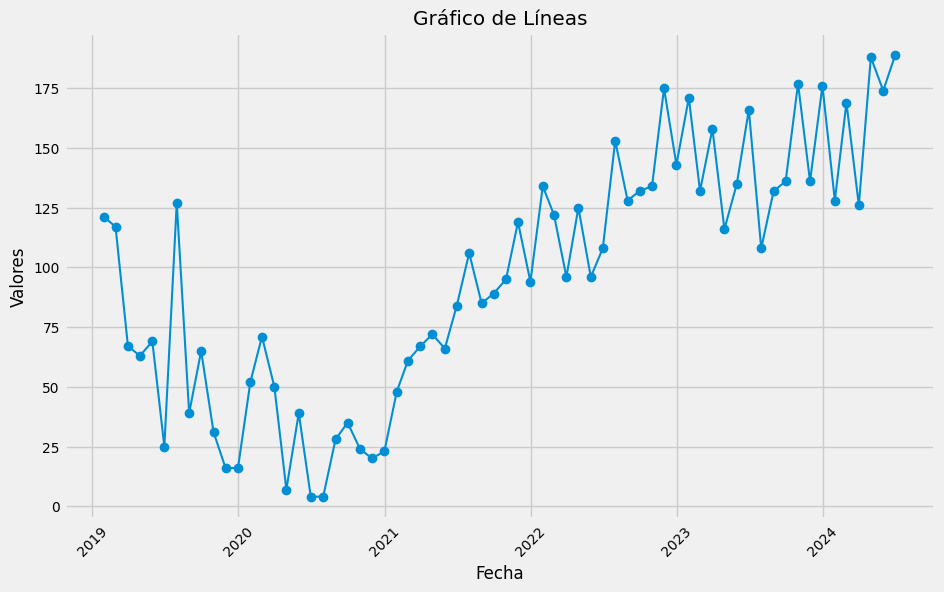

In [4]:
df_unificadopd2 = df_unificadopd.groupby(by=df_unificadopd.index)['Recuento_de_salida'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(df_unificadopd2['Year_month'],df_unificadopd2['Recuento_de_salida'],marker='o')
plt.xlabel('Fecha')  # Etiqueta del eje X
plt.ylabel('Valores')  # Etiqueta del eje Y
plt.title('Gráfico de Líneas')
plt.xticks(rotation=45) 
plt.show()